# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

Clasificar si un paciente puede tener o no diabetes

In [3]:
#Cargamos dataset a utilizar
url = 'C:/Users/JMoncada43/Downloads/pima-indians-diabetes.csv'
df_diabetes = pd.read_csv(url)

## Exploración de datos

In [6]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
272,1,71,78,50,45,33.2,0.422,21,0
520,3,124,80,33,130,33.2,0.305,26,0
458,9,134,74,33,60,25.9,0.460,81,0
148,2,90,70,17,0,27.3,0.085,22,0
519,2,68,70,32,66,25.0,0.187,25,0
611,7,168,88,42,321,38.2,0.787,40,1
285,5,155,84,44,545,38.7,0.619,34,0
187,8,109,76,39,114,27.9,0.640,31,1
271,3,122,78,0,0,23.0,0.254,40,0
735,0,126,86,27,120,27.4,0.515,21,0


In [7]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', 
                       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 
                       '3. Diastolic blood pressure (mm Hg)', 
                       '4. Triceps skin fold thickness (mm)', 
                       '5. 2-Hour serum insulin (mu U/ml)', 
                       '6. Body mass index (weight in kg/(height in m)^2)', 
                       '7. Diabetes pedigree function', 
                       '8. Age (years)', 
                       '9. Class variable (0 or 1)']

In [8]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [9]:
#Analizamos el shape del objeto
df_diabetes.shape

(767, 9)

In [10]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [12]:
#Separamos en X e y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis = 1)
y = df_diabetes['9. Class variable (0 or 1)']

In [13]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000) 

In [14]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000) # Lo ideal es empezar con pocos estimadores para ir ajustando el modelo.

# Los estimadores hacen alusión a la cantidad de arboles.

In [15]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [18]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy en train: ", train_accuracy)
print("Accuracy en test: ",test_accuracy)

# Se observa una brecha muy grande

Accuracy en train:  0.9850746268656716
Accuracy en test:  0.7445887445887446


In [ ]:
# Script para buscar la cantidad de parametros optima del modelo

"""
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parametros = {
  'n_estimators' : range(4,101),
  'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
  'max_depth' : range(2,11)
  }

rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy').fit(X,y)    

"""

In [21]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)


# Mostrar
feature_importances_df

#Estas son las variables mas relevantes para el modelo.

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

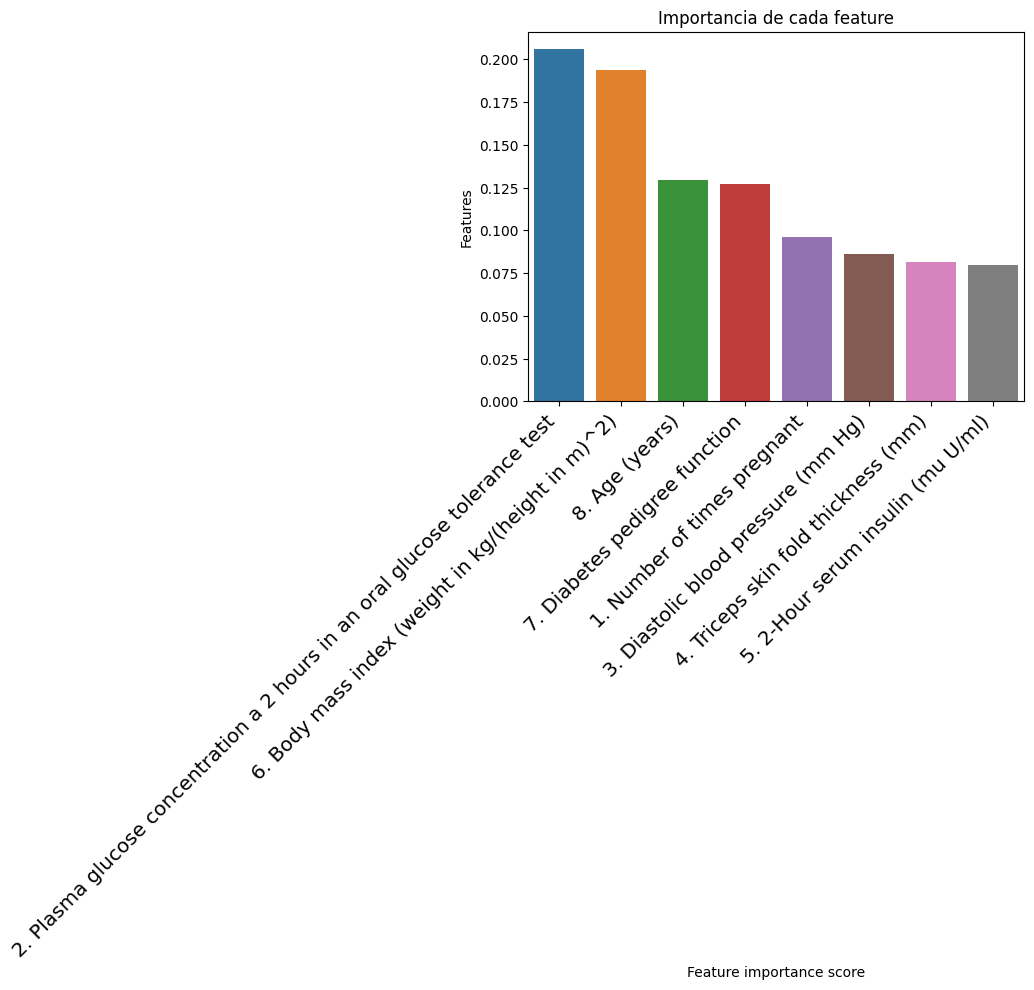

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = feature_importances_df.feature, y = feature_importances_df.importance)
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Importancia de cada feature")
plt.xticks(rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize= "x-large")

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**